In [1]:
import tensorflow as tf
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()  #inbuilt dataset

In [2]:
x_train.shape  #count of image = 60000 , rows = 28, columns = 28

(60000, 28, 28)

In [3]:
x_test.shape

(10000, 28, 28)

In [4]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [6]:
x_test

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [7]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)  # 1= channel, changes acc to the architecture

In [8]:
#preprocessing techniques varies for each problem statement
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

In [9]:
x_train /= 255  #x_train= (x_train/255) calculates and assigns to same variable
x_test /= 255

In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
model = Sequential()
model.add(Conv2D(28, kernel_size=(3,3), input_shape=input_shape))  #28=filters - enhances information
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())         #----oly till this convolution, after flatten next is neural network
model.add(Dense(128, activation=tf.nn.relu))   # 128 neuron - dense - remember that diagram, activation calling relu
model.add(Dropout(0.2))
model.add(Dense(10,activation=tf.nn.softmax))  #10= no of classes, activation calling softmax, can give in string also

#Dropout is only active during training, not during inference.
#If overused (too high dropout rate), it can slow learning or hurt performance.
#Typical dropout rates: 0.2 to 0.5.Especially useful in fully connected (dense) layers.

In [11]:
#https://keras.io/api/optimizers/
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(x=x_train,y=y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 29s 15ms/step - loss: 0.2044 - accuracy: 0.9388
Epoch 2/10
1875/1875 [==============================] - 28s 15ms/step - loss: 0.0822 - accuracy: 0.9749
Epoch 3/10
1875/1875 [==============================] - 29s 15ms/step - loss: 0.0556 - accuracy: 0.9820
Epoch 4/10
1875/1875 [==============================] - 28s 15ms/step - loss: 0.0417 - accuracy: 0.9865
Epoch 5/10
1875/1875 [==============================] - 30s 16ms/step - loss: 0.0358 - accuracy: 0.9886
Epoch 6/10
1875/1875 [==============================] - 29s 16ms/step - loss: 0.0273 - accuracy: 0.9912
Epoch 7/10
1875/1875 [==============================] - 29s 16ms/step - loss: 0.0234 - accuracy: 0.9919
Epoch 8/10
1875/1875 [==============================] - 29s 16ms/step - loss: 0.0213 - accuracy: 0.9925
Epoch 9/10
1875/1875 [==============================] - 29s 16ms/step - loss: 0.0186 - accuracy: 0.9938
Epoch 10/10
1875/1875 [==============================] - 30s 16m

In [12]:
#epochs = 1 ===>when entire dataset is passed through forward and backward through neural networks once
#epochs increases,  accuracy increase and loss decreses == good performance 

In [13]:
y_predict=model.evaluate(x_test, y_test)

313/313 [==============================] - 2s 6ms/step - loss: 0.0605 - accuracy: 0.9854


In [ ]:
#loss and accuracy

In [15]:
y_predict

[0.060531169176101685, 0.9854000210762024]

In [16]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [35]:
y_predicts

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

In [38]:
from sklearn.metrics import confusion_matrix
import numpy as np

# gives a 2D NumPy array of predicted probabilities for each class, Shape = (num_samples, num_classes)
y_predicts = np.argmax(model.predict(x_test), axis=1)   
#np.argmax= For each sample (each row), it picks the index of the highest probability-the predicted class label.
#Result: a 1D array of class predictions. Shape = (num_samples,)

# No need to process y_test — it's already label-encoded
#compares actual vs predicted to analyze performance
conf_mat = confusion_matrix(y_test, y_predicts)

print(conf_mat)

313/313 [==============================] - 1s 4ms/step
[[ 972    0    1    0    0    1    2    1    3    0]
 [   0 1127    2    1    0    1    2    2    0    0]
 [   1    3 1012    1    1    0    1   11    2    0]
 [   0    0    2  994    0    6    0    4    2    2]
 [   0    0    4    0  970    0    1    0    0    7]
 [   1    0    0    4    0  882    2    1    2    0]
 [   4    1    0    0    2    3  948    0    0    0]
 [   1    1    5    1    0    0    0 1017    1    2]
 [   5    1    6    1    0    1    1    3  950    6]
 [   2    3    1    3   10    3    0    4    1  982]]


In [36]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_predicts))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.98      0.98      1032
           3       0.99      0.98      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.98      0.99      0.99       892
           6       0.99      0.99      0.99       958
           7       0.98      0.99      0.98      1028
           8       0.99      0.98      0.98       974
           9       0.98      0.97      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



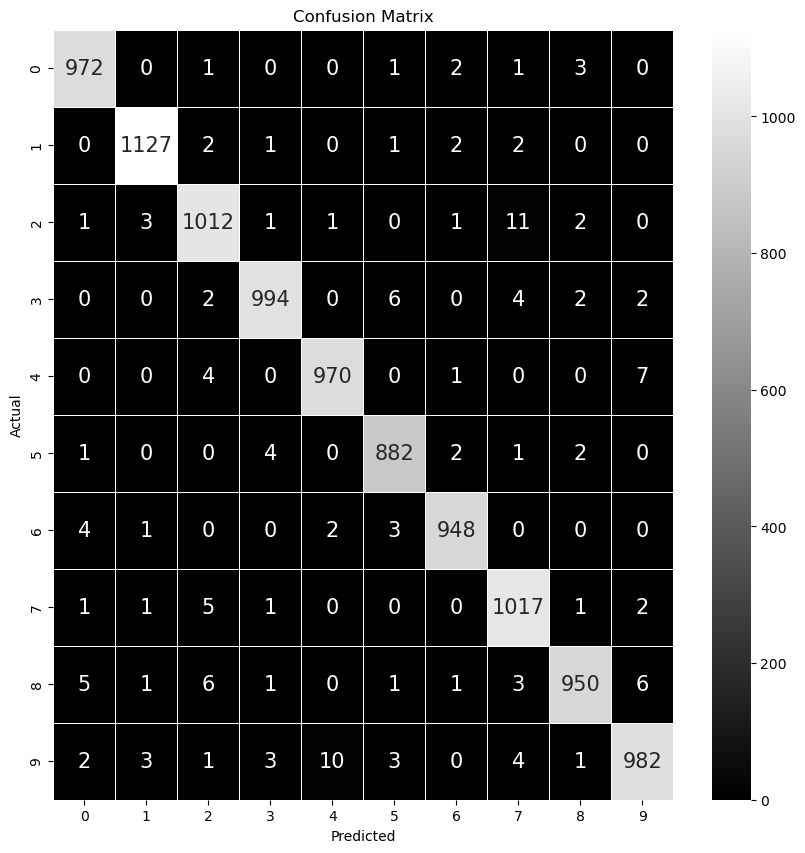

In [37]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
# confusion matrix
con_mat=confusion_matrix(y_test, y_predicts)
plt.style.use('seaborn-v0_8-deep')
plt.figure(figsize=(10,10))
sns.heatmap(con_mat,annot=True,annot_kws={'size':15},linewidths=0.5,fmt='d',cmap='gray')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

1/1 [==============================] - 0s 22ms/step
6


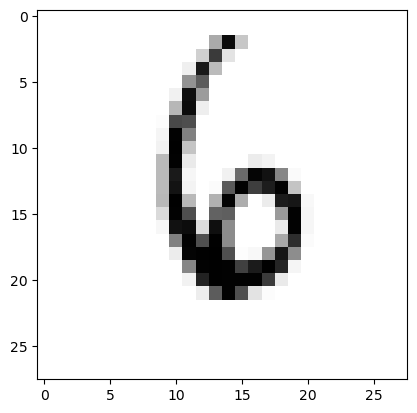

In [26]:
import matplotlib.pyplot as plt
image_index = 6900
plt.imshow(x_test[image_index].reshape(28, 28),cmap='Greys')
predict = x_test[image_index].reshape(28,28)
pred = model.predict(x_test[image_index].reshape(1, 28, 28, 1))
print(pred.argmax())